In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data Trained Projects/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


checking weirdness on the dataset by looking some features

In [ ]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
cont=[]
for i in df.columns:
  if df[i].nunique()>40:
    cont.append(i)

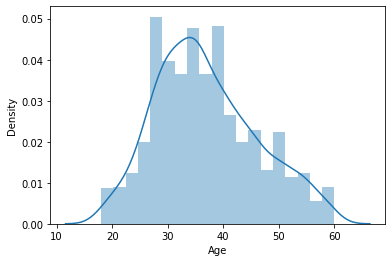

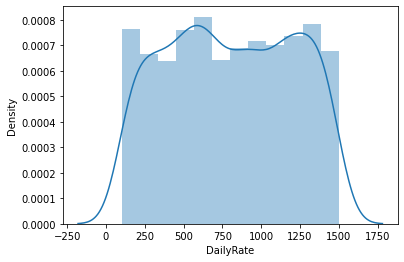

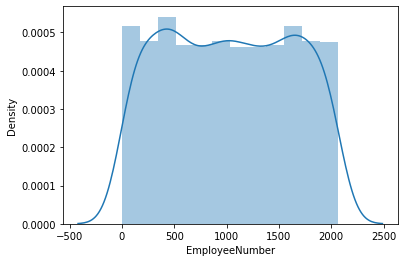

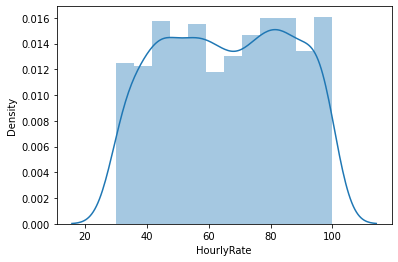

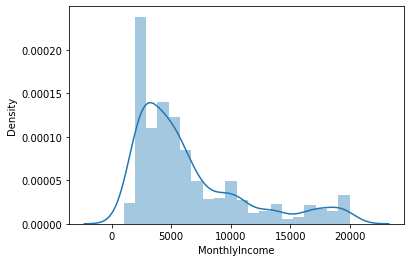

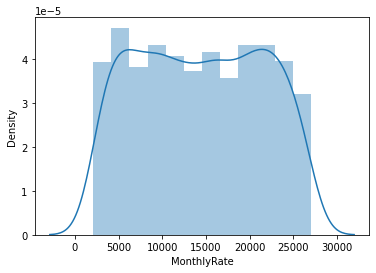

In [ ]:
for i in cont:
  sns.distplot(df[i])
  plt.show()

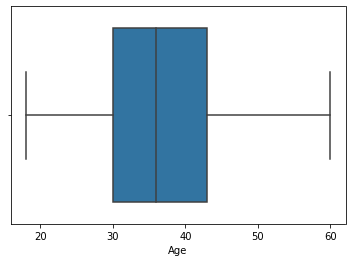

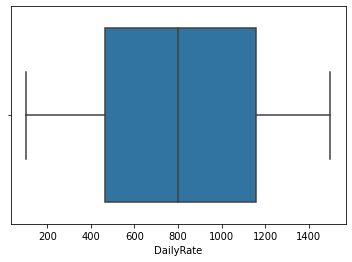

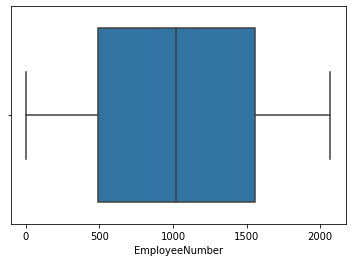

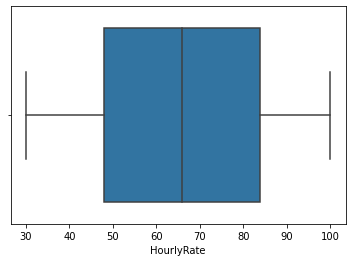

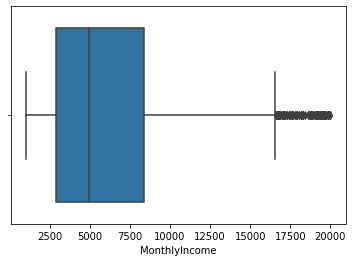

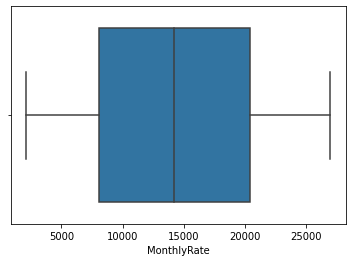

In [ ]:
for i in cont:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
for i in cont:
  upperlimit=df[i].quantile(0.84)
  lowerlimit=df[i].quantile(0.16)
  df.loc[df[i]>upperlimit,i]=upperlimit
  df.loc[df[i]<lowerlimit,i]=lowerlimit

In [ ]:
df['TotalWorkingYears'][df['TotalWorkingYears'] < 0].sum()

0

There is no negative value in years

In [ ]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

Marital status has only three unique values as we can see in the step above

In [ ]:
df['YearsAtCompany'][df['YearsAtCompany'] > 41].sum()

0

I checked if there is a weird number for 'YearsAtCompany'. but everything seems okay here

In [ ]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# Check for duplicate observations
df.duplicated().sum()

0

In [ ]:
# Reassign response variable
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [ ]:
# Inspect useless features
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
Age                           20
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
HourlyRate

In [ ]:
# Drop useless features and rename the dataframe
df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

In [ ]:
# # Moving Response Variable to the last column
# front = df2['Attrition']


In [ ]:
# df2.drop(labels=['Attrition'], axis=1,inplace=True)


In [ ]:
# df2.insert(31,'Attrition',front)
# df2.head()

In [ ]:
# # now i want that all the object type should be changed to category ,so i am doing that now 

# columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
# for i in columns:
#     df2[i] = df2[i].astype('category')

In [ ]:
#df2.info()

Inspecting columns of Categorical columns

In [ ]:
#df2[columns].nunique()

In [ ]:
# for i in columns:
#     display(df2[i].value_counts())

In [ ]:
df.skew()

Age                         0.249902
Attrition                   1.844366
DailyRate                   0.014544
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.013918
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.005391
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               0.578775
MonthlyRate                -0.000294
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
d

In [ ]:
df3= pd.get_dummies(df2, columns =  ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])

In [ ]:
df3.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41.0,1,1102.00,1,2,327.04,2,90.0,3,2,4,5993.0,19479.00,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,47.0,0,329.04,8,1,327.04,3,61.0,2,2,2,5130.0,22643.36,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37.0,1,1278.00,2,2,327.04,4,90.0,2,1,3,2534.2,5916.36,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33.0,0,1278.00,3,4,327.04,4,56.0,3,1,3,2909.0,22643.36,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,28.0,0,591.00,2,1,327.04,1,42.0,3,1,2,3468.0,16632.00,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
df3.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Age,1.000000,-0.154795,0.008612,-0.002380,0.187319,-0.000799,0.005851,0.034601,0.038867,0.508707,-0.005159,0.464625,0.026784,0.293100,0.004642,0.000643,0.048098,0.025987,0.661378,-0.018526,0.000928,0.304983,0.201601,0.215185,0.193526,-0.000557,-0.023904,0.020962,0.019288,0.017023,-0.026115,-0.005966,0.016880,0.041241,-0.009196,-0.029405,-0.032510,0.036346,-0.036346,0.098323,-0.027401,-0.136315,0.295332,0.043572,0.191618,-0.153339,-0.014335,-0.153337,0.025996,0.071785,-0.099870,-0.030814,0.030814
Attrition,-0.154795,1.000000,-0.064239,0.077924,-0.031373,-0.006527,-0.103369,-0.009740,-0.130016,-0.169105,-0.103481,-0.159202,0.014046,0.043494,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,-0.074457,0.115143,-0.049538,0.016832,-0.085293,0.080855,0.036466,-0.032703,0.055781,-0.046999,-0.017898,0.069355,-0.029453,0.029453,-0.078696,0.036215,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419,-0.246118,0.246118
DailyRate,0.008612,-0.064239,1.000000,-0.009717,-0.016559,-0.051727,0.017195,0.026784,0.047831,0.003615,0.031120,0.016255,-0.034443,0.036526,0.020768,-0.003019,0.010021,0.040360,0.014480,0.000283,-0.030545,-0.031419,0.007607,-0.035889,-0.023874,0.014617,-0.015049,0.003217,-0.023931,0.015658,-0.005662,-0.038662,0.008534,-0.068928,0.034340,-0.007259,0.028347,0.016829,-0.016829,0.033939,-0.020138,-0.003553,-0.011149,-0.008544,0.001731,0.000102,0.003158,-0.004163,0.040763,0.034707,-0.073428,-0.004861,0.004861
DistanceFromHome,-0.002380,0.077924,-0.009717,1.000000,0.021042,0.032857,-0.016075,0.030615,0.008783,0.005303,-0.003669,0.010746,0.024150,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.023605,0.005081,-0.020116,-0.012901,-0.008117,0.014085,-0.002624,-0.024499,0.039294,0.013486,-0.007969,-0.014802,0.001851,-0.001851,0.022916,-0.024089,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445,-0.025514,0.025514
Education,0.187319,-0.031373,-0.016559,0.021042,1.000000,0.041684,-0.027128,0.017962,0.042438,0.101589,-0.011296,0.109093,-0.021290,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,0.004524,-0.008292,0.004126,0.011435,-0.018604,0.014215,0.026479,0.013184,0.072405,-0.072335,0.038043,-0.026742,0.016547,-0.016547,0.024270,-0.005295,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168,0.020322,-0.020322
EmployeeNumber,-0.000799,-0.006527,-0.051727,0.032857,0.041684,1.000000,0.015632,0.042231,-0.007470,-0.020534,-0.050987,-0.009902,0.007856,-0.002239,-0.013666,-0.017660,-0.065897,0.061978,-0.014514,0.022735,0.010798,-0.013447,-0.011011,-0.007773,-0.010782,0.017939,-0.006962,-0.005964,0.065644,-0.036138,0.008479,0.035990,0.003772,-0.021505,-0.008751,0.010

In [ ]:
df3.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41.0,1,1102.00,1,2,327.04,2,90.0,3,2,4,5993.0,19479.00,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,47.0,0,329.04,8,1,327.04,3,61.0,2,2,2,5130.0,22643.36,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37.0,1,1278.00,2,2,327.04,4,90.0,2,1,3,2534.2,5916.36,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33.0,0,1278.00,3,4,327.04,4,56.0,3,1,3,2909.0,22643.36,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,28.0,0,591.00,2,1,327.04,1,42.0,3,1,2,3468.0,16632.00,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   float64
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EmployeeNumber                     1470 non-null   float64
 6   EnvironmentSatisfaction            1470 non-null   int64  
 7   HourlyRate                         1470 non-null   float64
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                      1470 non-null   float

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X=df3.drop(columns='Attrition')
y=df3['Attrition']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)
scalar = StandardScaler()
scalar.fit(X_train)
scaletrain = scalar.transform(X_train)
scaletest = scalar.transform(X_test)

In [ ]:
pca=PCA(n_components=15)
pca.fit(scaletrain)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
X_train=pca.transform(scaletrain)
X_test=pca.transform(scaletest)

In [ ]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
#X_train,X_test,y_train,y_test=train_test_split(xtrain,y,test_size=0.25,random_state=42,stratify=y)
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [ ]:
X_train_res.shape

(1848, 15)

In [ ]:
# scalar = StandardScaler()
# scalar.fit(X_train_res)
# scaletrain = scalar.transform(X_train_res)
# scaletest = scalar.transform(X_test)

## **1. Logistic Regression**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# lr=LogisticRegression(penalty='l1',solver='liblinear',C=0.01)
# lr.fit(scaletrain,y_train_res)
lr=LogisticRegression()
lr.fit(X_train_res,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.coef_

array([[-0.31998413,  0.32341592, -0.03178234, -0.08070637,  0.42586036,
         0.09731929,  0.39504815, -0.16313043, -0.0221159 , -0.0477809 ,
        -0.15743219, -0.11206233, -0.30908913, -0.01364322, -0.54102993]])

In [ ]:
y_train_pred=lr.predict(X_train_res)
y_test_pred=lr.predict(X_test)

In [ ]:
confusion_matrix(y_train_res,y_train_pred)

array([[672, 252],
       [251, 673]])

In [ ]:
print(classification_report(y_train_res,y_train_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       924
           1       0.73      0.73      0.73       924

    accuracy                           0.73      1848
   macro avg       0.73      0.73      0.73      1848
weighted avg       0.73      0.73      0.73      1848



In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[226,  83],
       [ 19,  40]])

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.82       309
           1       0.33      0.68      0.44        59

    accuracy                           0.72       368
   macro avg       0.62      0.70      0.63       368
weighted avg       0.83      0.72      0.76       368



# Decision Tree Classifier

In [ ]:
dtr=DecisionTreeClassifier(max_depth=12,max_features=15,ccp_alpha=0.01,min_samples_split=5)
dtr.fit(X_train_res,y_train_res)


DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='gini',
                       max_depth=12, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_train_pred=dtr.predict(X_train_res)
y_test_pred=dtr.predict(X_test)

In [ ]:
confusion_matrix(y_train_res,y_train_pred)

array([[824, 100],
       [412, 512]])

In [ ]:
print(classification_report(y_train_res,y_train_pred))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76       924
           1       0.84      0.55      0.67       924

    accuracy                           0.72      1848
   macro avg       0.75      0.72      0.71      1848
weighted avg       0.75      0.72      0.71      1848



In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[274,  35],
       [ 32,  27]])

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       309
           1       0.44      0.46      0.45        59

    accuracy                           0.82       368
   macro avg       0.67      0.67      0.67       368
weighted avg       0.82      0.82      0.82       368



# Decision Tree Classifier with Grid search CV

In [ ]:
param={'max_depth':[3,2,4,5,6,7,8,9],'min_samples_split':[1,2,3,4,5], 'min_impurity_split':[1,2,3,4,5],'max_features':[1,2,3,4,5,6]}
dt=DecisionTreeClassifier()
dtgrid=GridSearchCV(dt, param_grid=param,cv=3)
dtgrid.fit(X_train_res,y_train_res)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 2, 4, 5, 6, 7, 8, 9],
              

In [ ]:
y_train_pred=dtgrid.predict(X_train_res)
y_test_pred=dtgrid.predict(X_test)

In [ ]:
print(classification_report(y_train_res,y_train_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       924
           1       0.00      0.00      0.00       924

    accuracy                           0.50      1848
   macro avg       0.25      0.50      0.33      1848
weighted avg       0.25      0.50      0.33      1848

